In [639]:
import numpy as np
import pandas as pd
import seaborn
import random

In [640]:
def random_sales(min, max):
    li = []
    for i in range(0, 12):
        element = random.randint(min, max)
        li.append(element)
    return li

sales = pd.DataFrame({
    'Computers': random_sales(5, 10),
    'Laptops': random_sales(10, 25),
    'Smartphones': random_sales(15, 45),
    'Smart Watch': random_sales(10, 15),
    'TVs': random_sales(25, 100),
    'Dishwashers': random_sales(10, 50),
    'Microwave Ovens': random_sales(45, 80),
    'Refrigerators': random_sales(15, 80),
    'Washing machines': random_sales(10, 35),
    'Coffee Makers': random_sales(2, 15)
})

print(sales)

    Computers  Laptops  Smartphones  Smart Watch  TVs  Dishwashers  \
0          10       16           19           14   52           12   
1           7       19           43           13   94           12   
2           9       16           21           12   46           44   
3           7       21           45           12   30           21   
4           5       16           43           15   87           43   
5           7       14           17           12   67           48   
6           7       15           20           10   42           36   
7           6       21           36           12   94           24   
8           8       25           35           12   42           12   
9           5       19           31           14   65           46   
10          6       19           39           11   43           31   
11          9       18           20           10   44           11   

    Microwave Ovens  Refrigerators  Washing machines  Coffee Makers  
0                65

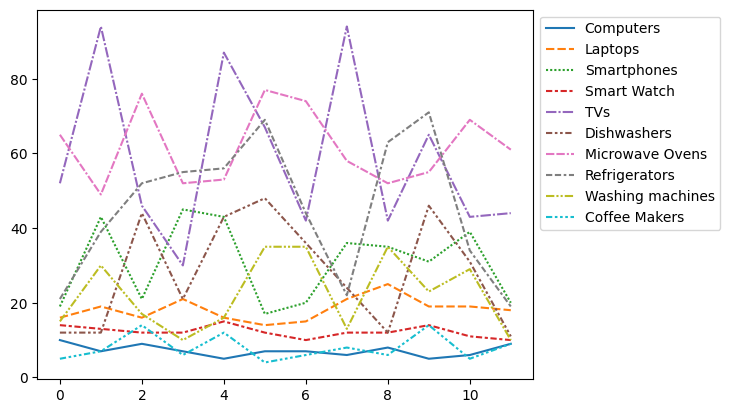

In [641]:
lp = seaborn.lineplot(sales)
seaborn.move_legend(lp, 'upper left', bbox_to_anchor=(1, 1))

In [642]:
p0 = sales.sum() / sales.shape[0]
print(p0)

Computers            7.166667
Laptops             18.250000
Smartphones         30.750000
Smart Watch         12.250000
TVs                 58.833333
Dishwashers         28.333333
Microwave Ovens     61.750000
Refrigerators       45.416667
Washing machines    22.333333
Coffee Makers        8.000000
dtype: float64


In [643]:
square_std = ((sales - p0) ** 2).sum() / (sales.shape[0] - 1)
std = square_std ** 0.5
reliability = std / p0
print(reliability)

Computers           0.221292
Laptops             0.170296
Smartphones         0.349465
Smart Watch         0.126105
TVs                 0.378395
Dishwashers         0.521184
Microwave Ovens     0.164735
Refrigerators       0.408321
Washing machines    0.447490
Coffee Makers       0.439525
dtype: float64


In [644]:
predict = pd.DataFrame([p0 + np.random.normal(0, std, len(p0))])
print(predict)

   Computers    Laptops  Smartphones  Smart Watch        TVs  Dishwashers  \
0   7.520076  23.426735    37.792964    12.429838  56.987246    33.583938   

   Microwave Ovens  Refrigerators  Washing machines  Coffee Makers  
0         86.43716      41.706098         13.438311        1.88737  


In [645]:
condition1 = ((sales - p0) < 2 * std).all()
condition2 = p0 > 2 * std
condition3 = (sales > 0).all()

print('Условие 1: ')
print(condition1)
print('\n')
print('Условие 2: ')
print(condition2)
print('\n')
print('Условие 3: ')
print(condition3)

Условие 1: 
Computers            True
Laptops             False
Smartphones          True
Smart Watch          True
TVs                  True
Dishwashers          True
Microwave Ovens      True
Refrigerators        True
Washing machines     True
Coffee Makers        True
dtype: bool


Условие 2: 
Computers            True
Laptops              True
Smartphones          True
Smart Watch          True
TVs                  True
Dishwashers         False
Microwave Ovens      True
Refrigerators        True
Washing machines     True
Coffee Makers        True
dtype: bool


Условие 3: 
Computers           True
Laptops             True
Smartphones         True
Smart Watch         True
TVs                 True
Dishwashers         True
Microwave Ovens     True
Refrigerators       True
Washing machines    True
Coffee Makers       True
dtype: bool


In [646]:
product_color = pd.Series(dtype='string')
for product in sales.columns:
    if not condition3[product]:
        product_color[product] = 'Red'
    elif not condition1[product] and not condition2[product]:
        product_color[product] = 'Orange'
    elif not condition1[product] or not condition2[product]:
        product_color[product] = 'Yellow'
    else:
        product_color[product] = 'Green'

print(product_color)

Computers            Green
Laptops             Yellow
Smartphones          Green
Smart Watch          Green
TVs                  Green
Dishwashers         Yellow
Microwave Ovens      Green
Refrigerators        Green
Washing machines     Green
Coffee Makers        Green
dtype: object
